This is a model where we used Natural language Processing to predict the movie genre using its Plot

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("movie.metadata.tsv", sep = '\t', header = None)

In [3]:

df.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [4]:
df.columns=['Movie_id','Stat1','Movie_name','Release_Year','Stat2','Stat3','Stat4','Stat5','Genre']

In [5]:
df.head()

,Movie_id,Stat1,Movie_name,Release_Year,Stat2,Stat3,Stat4,Stat5,Genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [6]:
import csv
from tqdm import tqdm
plots = []
with open("plot_summaries.txt", 'r',encoding="utf8") as file:
    reader = csv.reader(file,dialect='excel-tab')
    for row in reader:
        plots.append(row)
    

In [9]:
plots[:3]

[['23890098',
  "Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."],
 ['31186339',
  'The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games. The tributes must fight to the death in an arena; the sole survivor is rewarded with fame and wealth. In her first Reaping, 12-year-old Primrose Everdeen is chosen from District 12. Her older sister Katniss volunteers to take her place. Peeta Mellark, a baker\'s son who once gave Katniss bread when she was starving, is the other District 12 tribute. Katniss and Peeta are taken to the Capitol, accompanied by their frequently drunk mentor, past victor Haymitch Abernathy. He warns them about the "Career" tributes who train intensively at speci

In [8]:
movie_id = []
plot = []

for i in tqdm(plots):
    movie_id.append(i[0])
    plot.append(i[1])

movies = pd.DataFrame({'Movie_id': movie_id, 'plot': plot})

100%|████████████████████████████████| 42303/42303 [00:00<00:00, 607521.94it/s]


In [9]:
movies.head()

,Movie_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [10]:
df['Movie_id'] = df['Movie_id'].astype(str)

In [11]:
df['Movie_id']

0          975900
1         3196793
2        28463795
3         9363483
4          261236
5        13696889
6        18998739
7        10408933
8         9997961
9         2345652
10         175026
11       24229100
12        6631279
13         171005
14       18296435
15       11250635
16       30388930
17          77856
18       32456683
19       33420460
20         175024
21         612710
22       21926710
23       33427105
24       31983669
25       17715326
26       22087420
27       20604092
28       21344842
29         156558
           ...   
81711    31422084
81712     9998038
81713     7762741
81714    25011340
81715    29449643
81716    25919941
81717    31170309
81718    21975745
81719    20244619
81720     7761830
81721    34474142
81722    26044505
81723    28373912
81724    19286279
81725     1918494
81726      664006
81727    24209227
81728     3868432
81729    15394941
81730    31353375
81731    23687925
81732    26482675
81733    23851782
81734    12095128
81735    3

In [12]:
movies = pd.merge(movies,df[['Movie_id','Movie_name','Genre']],on = 'Movie_id')

In [13]:
movies

,Movie_id,plot,Movie_name,Genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
5,5272176,The president is on his way to give a speech. ...,End Game,"{""/m/01jfsb"": ""Thriller"", ""/m/03btsm8"": ""Actio..."
6,1952976,"{{plot}} The film opens in 1974, as a young gi...",Dark Water,"{""/m/01jfsb"": ""Thriller"", ""/m/07s9rl0"": ""Drama..."
7,24225279,"The story begins with Hannah, a young Jewish t...",Sing,"{""/m/07s9rl0"": ""Drama"", ""/m/02b5_l"": ""Teen""}"
8,2462689,Infuriated at being told to write one final co...,Meet John Doe,"{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3nby"": ..."
9,20532852,A line of people drool at the window of the s...,Destination Meatball,"{""/m/02hmvc"": ""Short Film"", ""/m/0hqxf"": ""Famil..."


In [14]:
import json

In [18]:
movies['Genre'][0]

'{"/m/07s9rl0": "Drama", "/m/03q4nz": "World cinema"}'

In [17]:
list(json.loads(movies['Genre'][0]).values())

['Drama', 'World cinema']

In [20]:
genres = []
for i in movies['Genre']:
    genres.append(list(json.loads(i).values()))

In [30]:
sum(genres,[])

['Drama',
 'World cinema',
 'Action/Adventure',
 'Science Fiction',
 'Action',
 'Drama',
 'Musical',
 'Action',
 'Drama',
 'Bollywood',
 'Screwball comedy',
 'Comedy',
 'Crime Fiction',
 'Drama',
 'Docudrama',
 'World cinema',
 'Courtroom Drama',
 'Thriller',
 'Action/Adventure',
 'Action',
 'Drama',
 'Thriller',
 'Drama',
 'Horror',
 'Drama',
 'Teen',
 'Romantic comedy',
 'Media Satire',
 'Americana',
 'Comedy-drama',
 'Black-and-white',
 'Drama',
 'Comedy',
 'Romance Film',
 'Short Film',
 'Family Film',
 'Animation',
 'Comedy',
 'Crime Fiction',
 'Drama',
 'Comedy',
 'World cinema',
 'Parody',
 'Comedy',
 'War film',
 'Epic',
 'Action/Adventure',
 'Period piece',
 'Drama',
 'Film adaptation',
 'Action',
 'Political drama',
 'Cult',
 'Coming of age',
 'Comedy',
 'Teen',
 'Horror',
 'Thriller',
 'Mystery',
 'Comedy film',
 'Crime Fiction',
 'Horror',
 'Drama',
 'Thriller',
 'Crime Fiction',
 'Indie',
 'Martial Arts Film',
 'Romance Film',
 'Action',
 'Period piece',
 'Drama',
 'Indie'

In [23]:
movies['Genre_new'] = genres

In [20]:
movies.head()

,Movie_id,plot,Movie_name,Genre,Genre_new
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]"
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...","[Screwball comedy, Comedy]"
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, Docudrama, World cinema..."


In [25]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42204 entries, 0 to 42203
Data columns (total 5 columns):
Movie_id      42204 non-null object
plot          42204 non-null object
Movie_name    42204 non-null object
Genre         42204 non-null object
Genre_new     42204 non-null object
dtypes: object(5)
memory usage: 3.2+ MB


In [26]:
movies_new = movies[~(movies['Genre_new'].str.len()==0)]

In [27]:
movies_new.shape,movies.shape

((41793, 5), (42204, 5))

In [28]:
movies[movies['Genre_new'].str.len()==0]

,Movie_id,plot,Movie_name,Genre,Genre_new
26,10644072,A villager new to the big city – Bhagwaan – t...,Bhagwan Dada,{},[]
205,26003987,All That I Love is a film about a young musici...,All That I Love,{},[]
249,9734319,Meenakshi is a widow living with her son Nand...,Anantha Poongathe,{},[]
266,35295429,Samson and Mallika have just been released f...,Thappana,{},[]
311,34638152,The Portuguese want to set up an army base in ...,Sivandha Mann,{},[]
355,35019319,*Neena Gupta as Draupadi *Gopi Manohar *G.V....,Bhagavad Gita,{},[]
435,35586499,"Nasibo is the sister of Naajar Singh, living w...",Nasibo,{},[]
583,8249465,Chiranjeevi's mother dies when he is very smal...,Hitler,{},[]
869,5562511,"The film begins with Kadhirvel , a do-gooder g...",Thagapansamy,{},[]
900,34307355,"Amaran ([[Karthik , a orphan child, is brought...",Amaran,{},[]


In [31]:
all_genres = sum(genres,[])

In [32]:
len(set(all_genres))

363

In [33]:
import nltk

In [34]:
genres_dict = nltk.FreqDist(all_genres)

In [35]:
genres_dict

FreqDist({'Drama': 19134, 'Comedy': 10467, 'Romance Film': 6666, 'Thriller': 6530, 'Action': 5868, 'World cinema': 5153, 'Crime Fiction': 4275, 'Horror': 4082, 'Black-and-white': 3731, 'Indie': 3668, ...})

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
genre_table = pd.DataFrame({'Genre':list(genres_dict.keys()),'Freq':list(genres_dict.values())})

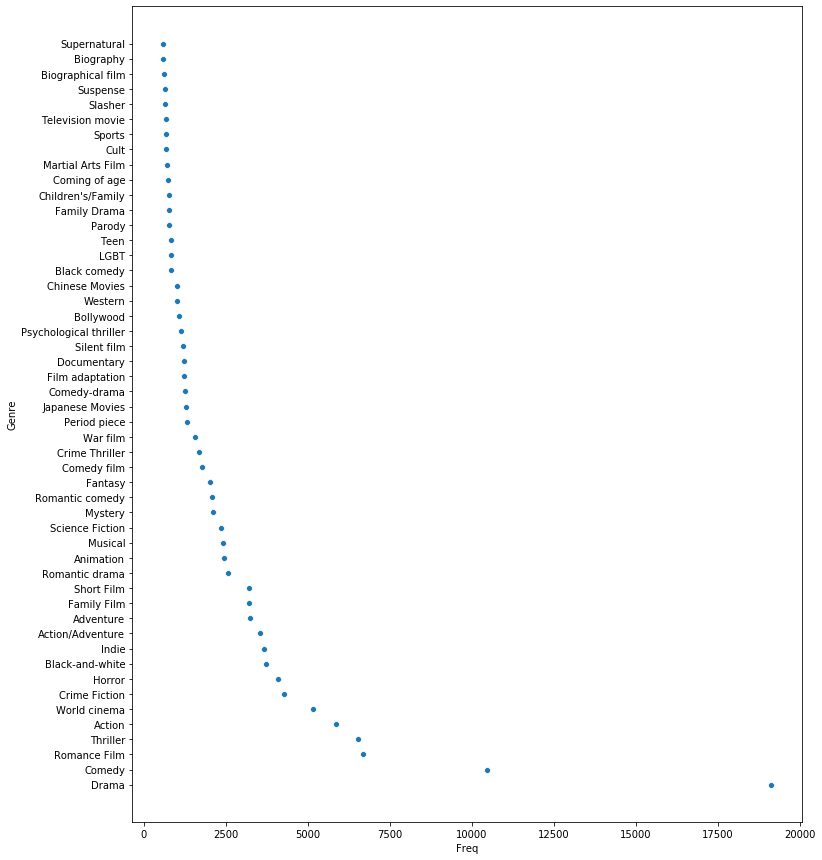

In [38]:
g = genre_table.nlargest(columns="Freq", n = 50)
plt.figure(figsize=(12,15))
sns.scatterplot(data= g,x= 'Freq',y='Genre')
plt.show()

In [39]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
replace_symbols = re.compile('[/(){}\[\]\|@,;]')
bad_symbols = re.compile('[^0-9a-z]')
STOPWORDS = set(stopwords.words('english'))
def text_preprocess(txt):
    txt = txt.lower()
    txt = replace_symbols.sub("",txt)
    txt = bad_symbols.sub(" ",txt)
    txt = " ".join([t for t in txt.split() if t not in STOPWORDS])
    
    return txt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
def text_freq_count(txt,n=50):
    all_words = ' '.join([text for text in txt])
    ind_word = all_words.split()
    Freq_words = nltk.FreqDist(ind_word)
    
    Word_Freq_Table = pd.DataFrame({'words' : list(Freq_words.keys()),'count':list(Freq_words.values()) })
    g = Word_Freq_Table.nlargest(columns="count", n = n)
    plt.figure(figsize=(12,15))
    sns.barplot(data= g,x= 'count',y='words')
    plt.show()

In [40]:
movies_new['clean_plot'] = movies_new['plot'].apply(lambda x: text_preprocess(x))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
movies_new

,Movie_id,plot,Movie_name,Genre,Genre_new,clean_plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]",shlykov hard working taxi driver lyosha saxoph...
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr...",nation panem consists wealthy capitol twelve p...
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]",poovalli induchoodan sentenced six years priso...
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...","[Screwball comedy, Comedy]",lemon drop kid new york city swindler illegall...
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, Docudrama, World cinema...",seventh day adventist church pastor michael ch...
5,5272176,The president is on his way to give a speech. ...,End Game,"{""/m/01jfsb"": ""Thriller"", ""/m/03btsm8"": ""Actio...","[Thriller, Action/Adventure, Action, Drama]",president way give speech traveling man shows ...
6,1952976,"{{plot}} The film opens in 1974, as a young gi...",Dark Water,"{""/m/01jfsb"": ""Thriller"", ""/m/07s9rl0"": ""Drama...","[Thriller, Drama, Horror]",plot film opens 1974 young girl dahlia stands ...
7,24225279,"The story begins with Hannah, a young Jewish t...",Sing,"{""/m/07s9rl0"": ""Drama"", ""/m/02b5_l"": ""Teen""}","[Drama, Teen]",story begins hannah young jewish teen completi...
8,2462689,Infuriated at being told to write one final co...,Meet John Doe,"{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3nby"": ...","[Romantic comedy, Media Satire, Americana, Com...",infuriated told write one final column laid ne...
9,20532852,A line of people drool at the window of the s...,Destination Meatball,"{""/m/02hmvc"": ""Short Film"", ""/m/0hqxf"": ""Famil...","[Short Film, Family Film, Animation]",line people drool window shop market butcher b...


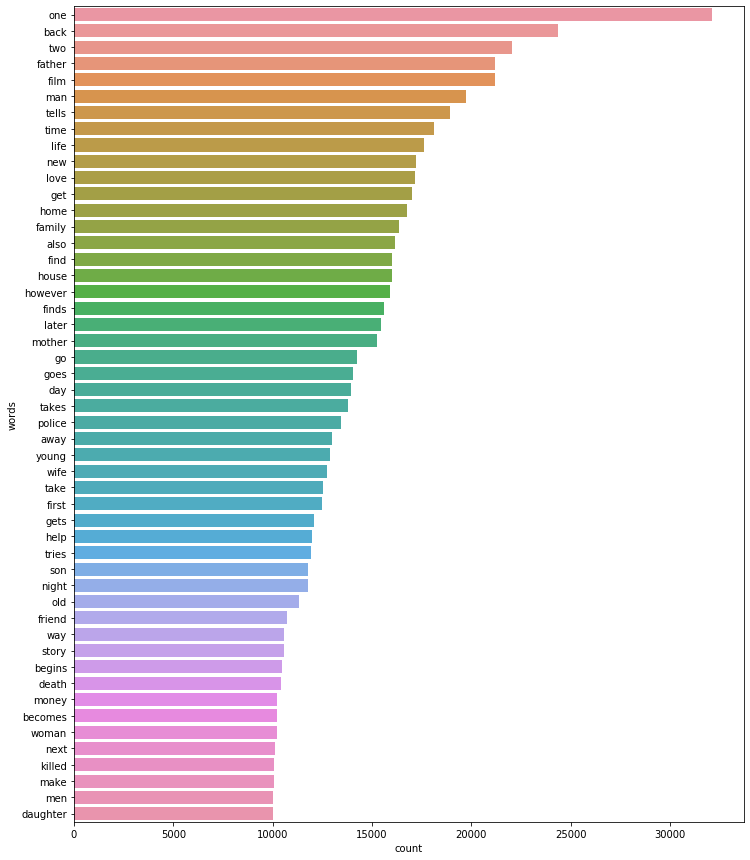

In [112]:
text_freq_count(movies_new['clean_plot'])

In [43]:
from sklearn.preprocessing import MultiLabelBinarizer

In [44]:
mb = MultiLabelBinarizer()

In [46]:
mb.fit(movies_new['Genre_new'])

MultiLabelBinarizer(classes=None, sparse_output=False)

In [47]:
y = mb.transform(movies_new['Genre_new'])

In [48]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
X_train,X_test,y_train,y_test = train_test_split(movies_new['clean_plot'],y,test_size=0.20,random_state=42)

In [87]:
vecorized_x_train = tfidf_vectorizer.fit_transform(X_train)

In [88]:
vecorized_x_test = tfidf_vectorizer.transform(X_test)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
lr = LogisticRegression()
ovr = OneVsRestClassifier(lr)
ovr.fit(vecorized_x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 61 is present in all training examples.
  str(classes[c]))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 74 is present in all training examples.
  str(classes[c]))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 243 is present in all training examples.
  str(classes[c]))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 245 is present in all training examples.
  str(classes[c]))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 259 is present in all training examples.
  str(classes[c]))
C:\Users\user\Anaconda3\lib\site-packages\

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [99]:
y_pred = ovr.predict(vecorized_x_test)

In [100]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [101]:
y_pred_actual = mb.inverse_transform(y_pred)

In [102]:
y_pred_actual

[('Drama',),
 ('Action',),
 ('Drama',),
 (),
 ('Adventure',),
 (),
 ('Drama',),
 (),
 ('Mystery', 'Thriller'),
 ('Drama', 'Thriller'),
 ('Drama',),
 ('Drama',),
 (),
 ('Drama',),
 ('Black-and-white', 'Comedy'),
 ('Drama',),
 ('Action',
  'Action/Adventure',
  'Drama',
  'Japanese Movies',
  'Martial Arts Film',
  'World cinema'),
 ('Comedy',),
 ('Documentary',),
 (),
 (),
 (),
 ('Thriller',),
 (),
 (),
 ('Drama', 'War film', 'World cinema'),
 ('Drama', 'Romance Film'),
 ('Comedy',),
 ('Black-and-white', 'Comedy', 'Short Film'),
 ('Drama', 'Romance Film'),
 ('Drama',),
 (),
 (),
 ('Thriller',),
 ('Horror',),
 (),
 ('Japanese Movies',),
 ('Action', 'Action/Adventure'),
 ('Drama',),
 (),
 ('Horror',),
 ('Comedy',),
 ('Thriller',),
 ('Drama',),
 ('Drama',),
 ('Comedy', 'Drama'),
 (),
 ('Action', 'Science Fiction', 'Thriller'),
 ('Drama',),
 ('Drama',),
 ('Drama',),
 ('Drama',),
 (),
 ('Drama', 'War film'),
 ('Drama',),
 ('Comedy',),
 ('Drama',),
 ('Drama',),
 ('Action/Adventure', 'Western'

In [103]:
f1_score(y_test, y_pred, average="micro")

0.31164707990885115

In [112]:
def predict_plot(plots):
    plt = text_preprocess(plots)
    x_plt= tfidf_vectorizer.transform([plt])
    plt_predict = ovr.predict(x_plt)
    return mb.inverse_transform(plt_predict)

In [115]:
for i in range(5): 
    k = X_test.sample(1).index[0] 
    print("Movie: ", movies_new['Movie_name'][k], "\nPredicted genre: ", predict_plot(X_test[k])), print("Actual genre: ",movies_new['Genre_new'][k], "\n")


Movie:  Sabrina 
Predicted genre:  [('Drama', 'Romance Film')]
Actual genre:  ['Romantic comedy', 'Romance Film', 'Drama', 'Comedy'] 

Movie:  Kempe Gowda 
Predicted genre:  [()]
Actual genre:  ['Thriller', 'Crime Fiction', 'Action', 'Drama'] 

Movie:  Murai Maman 
Predicted genre:  [('Drama', 'Romance Film')]
Actual genre:  ['Comedy film'] 

Movie:  Stranded: NxE1ufragos 
Predicted genre:  [('Adventure', 'Science Fiction')]
Actual genre:  ['Thriller', 'Science Fiction', 'Adventure', 'World cinema', 'Drama', 'Disaster'] 

Movie:  Sur les murs de la ville 
Predicted genre:  [()]
Actual genre:  ['Animation'] 



In [126]:
a= predict_plot("Dom Cobb is a skilled thief, the absolute best in the dangerous art of extraction, stealing valuable secrets from deep within the subconscious during the dream state, when the mind is at its most vulnerable. Cobb's rare ability has made him a coveted player in this treacherous new world of corporate espionage, but it has also made him an international fugitive and cost him everything he has ever loved. Now Cobb is being offered a chance at redemption. One last job could give him his life back but only if he can accomplish the impossible, inception. Instead of the perfect heist, Cobb and his team of specialists have to pull off the reverse: their task is not to steal an idea, but to plant one. If they succeed, it could be the perfect crime. But no amount of careful planning or expertise can prepare the team for the dangerous enemy that seems to predict their every move. An enemy that only Cobb could have seen coming.")

In [127]:
a

[()]